In [2]:
# 載入套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

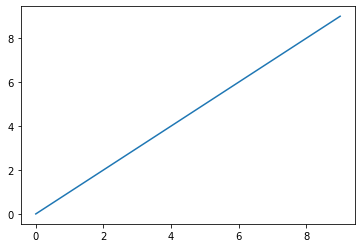

In [3]:
data = np.arange(10)
plt.plot(data) # 作圖

In [ ]:
fig = plt.figure() # -->可以在括號內輸入尺寸plt.figure(figsize=[8, 4])
ax1 = fig.add_subplot(2, 2, 1) # (行,列,位置)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

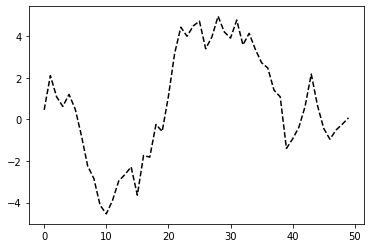

In [5]:
plt.plot(np.random.randn(50).cumsum(), 'k--') # 'k--': 線條形式

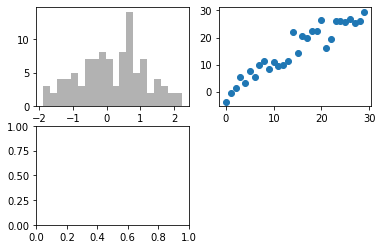

In [6]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3) # .hist 直方
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30)) # .scatter 散點
fig

In [7]:
plt.close('all') # 關閉

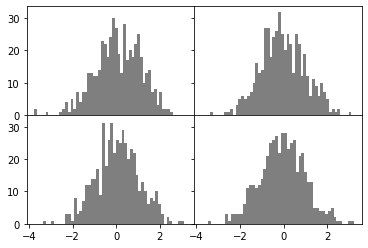

In [8]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

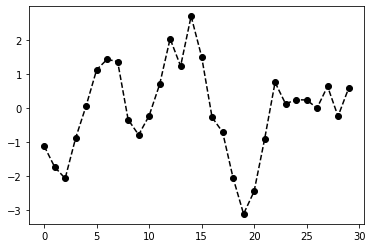

In [10]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--') # 帶點折線

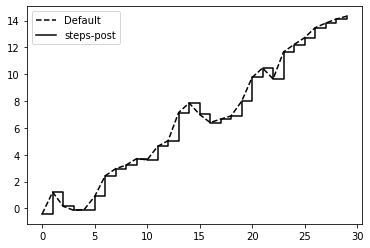

In [11]:
# linewidth:線條粗細
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default') # linestyle: 線條形式('-'實線|'--'虛線|':'點線|'-.'虛點線)
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best') # 添加圖例，自動選擇最佳位置

In [ ]:
# marker: 標出數據點('o'圓點|'s'方塊|'*'星號|'^'三角形), markersize調大小
# color: 顏色

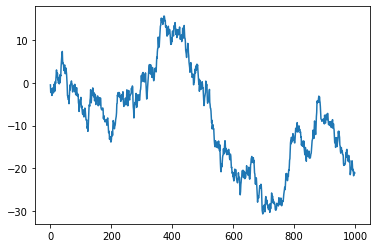

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

In [13]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000]) # 設置刻度
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

In [ ]:
ax.set_title('My first matplotlib plot') # 添加標題
ax.set_xlabel('Stages') # 設置座標軸標籤,fontsize設置字體大小--> ('x',fontsize=14)

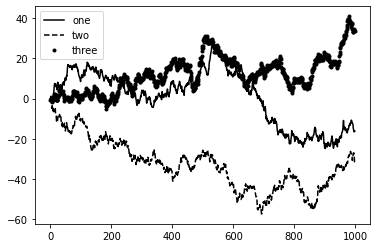

In [19]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

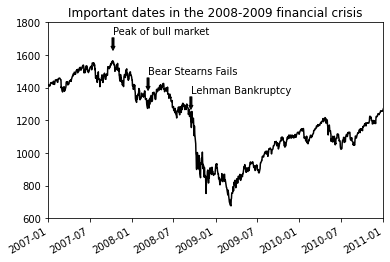

In [17]:
# 範例
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

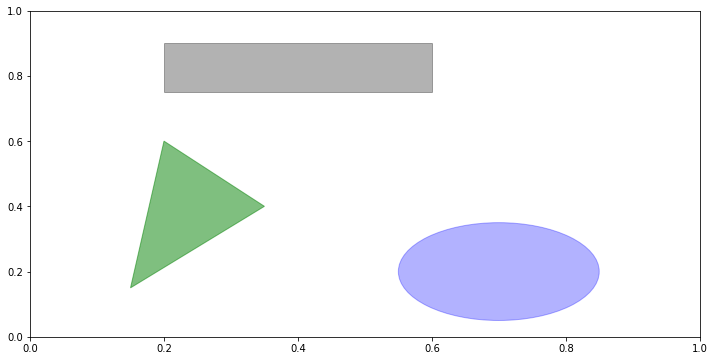

In [20]:
fig = plt.figure(figsize=(12, 6)); ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)  # 添加形狀
ax.add_patch(circ)
ax.add_patch(pgon)

In [21]:
plt.savefig('figpath.svg') # 保存檔案

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

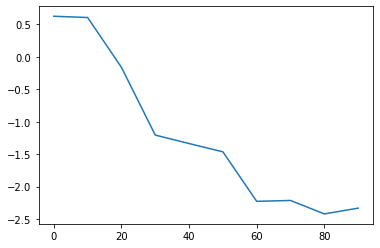

In [23]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot() # Series 畫圖

<AxesSubplot:>

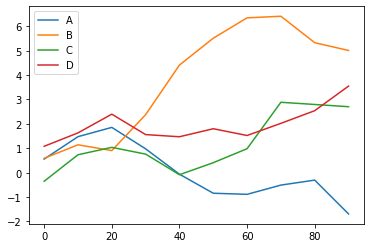

In [24]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot() # DataFrame 畫圖

<AxesSubplot:>

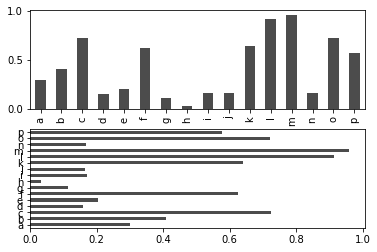

In [25]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7) # 柱狀圖
data.plot.barh(ax=axes[1], color='k', alpha=0.7) # 橫式

<AxesSubplot:>

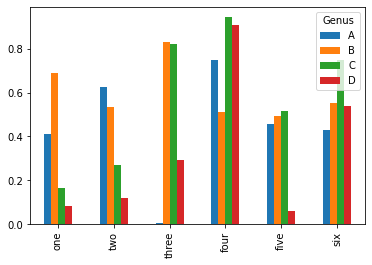

In [26]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df.plot.bar()

<AxesSubplot:>

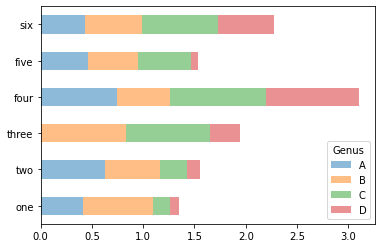

In [27]:
df.plot.barh(stacked=True, alpha=0.5) # 亦可堆疊

In [33]:
# 更多範例
tips = pd.read_csv('tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size']) # .crosstab 變量分組
party_counts = party_counts.loc[:, 2:5]  # 只看 2 - 5 人

<AxesSubplot:xlabel='day'>

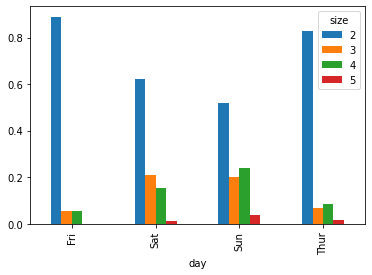

In [39]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0) # 規一化
party_pcts.plot.bar()

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

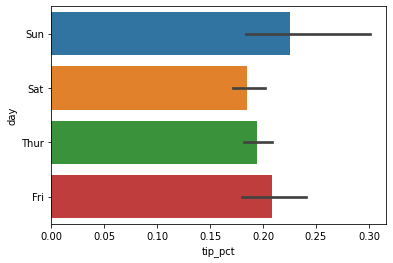

In [41]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip']) # pct: percent
tips.head()
sns.barplot(x='tip_pct', y='day', data=tips, orient='h') # orient='h' 橫

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

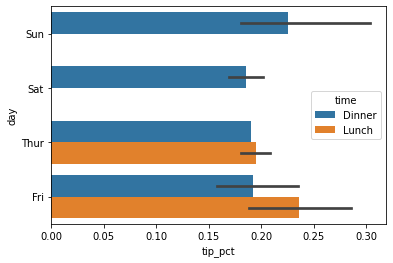

In [43]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h') # hue='time' 以指定條件分組
# sns.set(style="whitegrid") # 設置主題 darkgrid , whitegrid , dark , white , ticks

<AxesSubplot:ylabel='Frequency'>

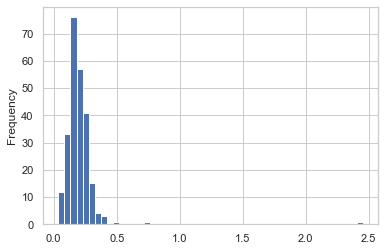

In [48]:
tips['tip_pct'].plot.hist(bins=50)

<AxesSubplot:ylabel='Density'>

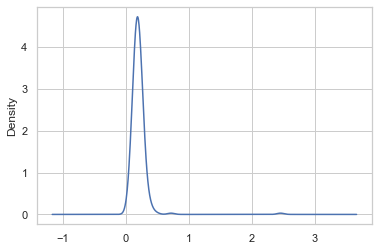

In [49]:
tips['tip_pct'].plot.density() # 密度圖

C:\Users\Max\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

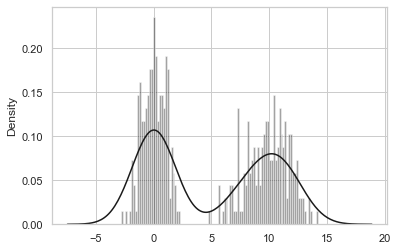

In [50]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k') # 直方與密度

In [52]:
macro = pd.read_csv('macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna() # diff 離差
trans_data[-5:] # 後五

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


C:\Users\Max\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

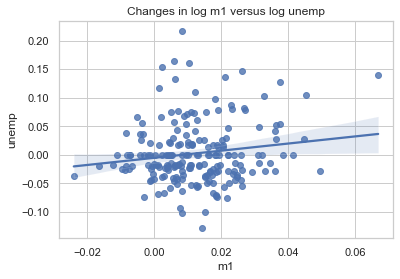

In [53]:
sns.regplot('m1', 'unemp', data=trans_data) # .regplot 線性回歸
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

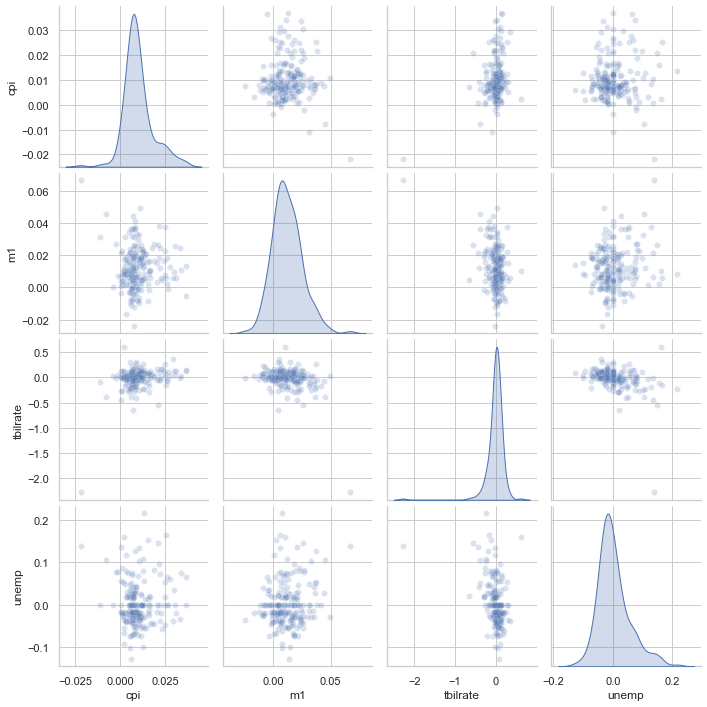

In [54]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2}) # pairplot 變數之間的關係作圖

C:\Users\Max\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


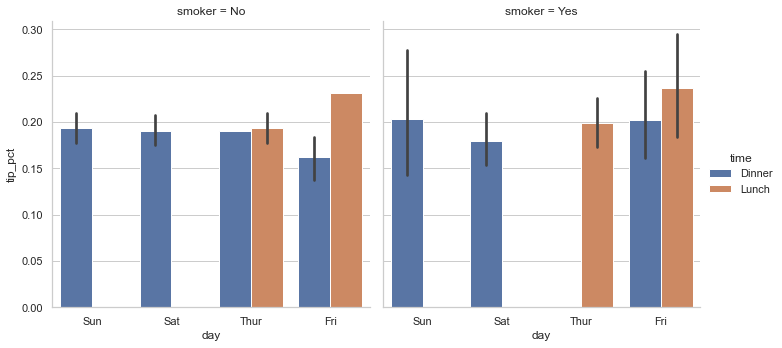

In [55]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1]) # 欄位區分

C:\Users\Max\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


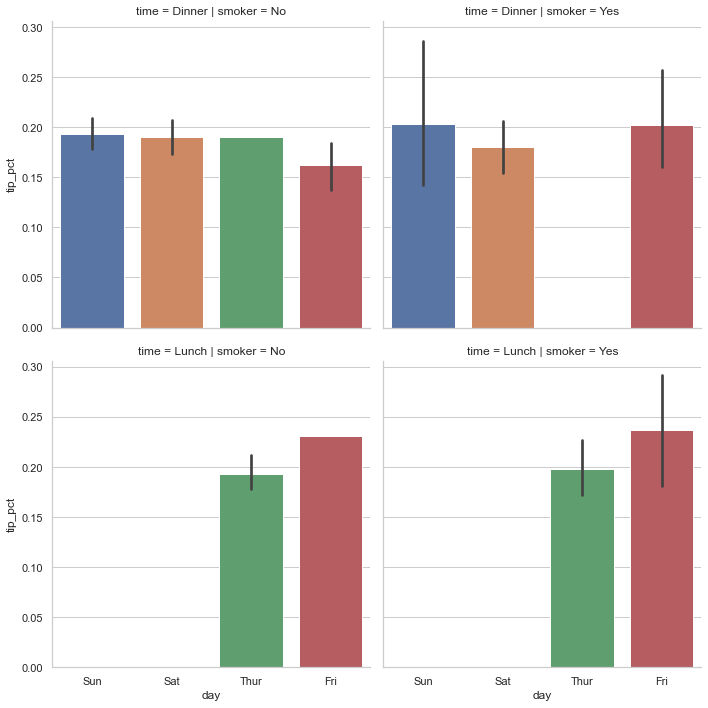

In [56]:
# row x col = 'time' x 'smoker' = 2 x 2
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

C:\Users\Max\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


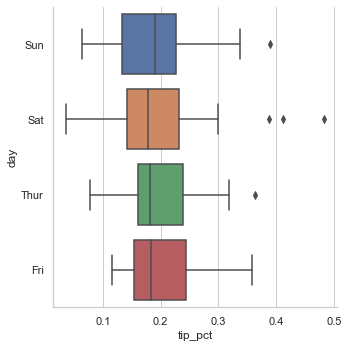

In [57]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5]) # 箱型圖